In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
d2015 = pd.read_csv('source/outputTWO.csv')
d2022 = pd.read_csv('source/outputTHREE.csv')
d2019 = pd.read_csv('source/outputONE.csv')

In [2]:
d2015.head()

,latitude,longitude,altitude,hourly.time,hourly.temperature_2m,hourly.relative_humidity_2m,hourly.dew_point_2m,hourly.apparent_temperature,hourly.precipitation,hourly.rain,...,hourly.diffuse_radiation,hourly.direct_normal_irradiance,hourly.global_tilted_irradiance,hourly.terrestrial_radiation,hourly.shortwave_radiation_instant,hourly.direct_radiation_instant,hourly.diffuse_radiation_instant,hourly.direct_normal_irradiance_instant,hourly.global_tilted_irradiance_instant,hourly.terrestrial_radiation_instant
0,40.175747,-7.194946,570.0,2015-06-20T00:00,20.2,59,11.9,19.3,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,40.175747,-7.194946,570.0,2015-06-20T01:00,19.4,62,11.9,18.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,40.175747,-7.194946,570.0,2015-06-20T02:00,18.5,65,11.9,17.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,40.175747,-7.194946,570.0,2015-06-20T03:00,18.0,66,11.6,16.8,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,40.175747,-7.194946,570.0,2015-06-20T04:00,17.5,67,11.4,16.1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
d2015['region'] = 0
d2019['region'] = 1
d2022['region'] = 2

d2015['Fire'] = 0
d2015.loc[d2015.index[-1], 'Fire'] = 1

d2019['Fire'] = 0
d2019.loc[d2019.index[-1], 'Fire'] = 1

d2022['Fire'] = 0
d2022.loc[d2022.index[-1], 'Fire'] = 1

d2015 = d2015.drop(['latitude','longitude','altitude', 'hourly.is_day'], axis=1)
d2019 = d2019.drop(['latitude','longitude','altitude', 'hourly.is_day'], axis=1)
d2022 = d2022.drop(['latitude','longitude','altitude', 'hourly.is_day'], axis=1)
df = pd.concat([d2015, d2019, d2022])
df.to_csv('combined.csv', index=False)

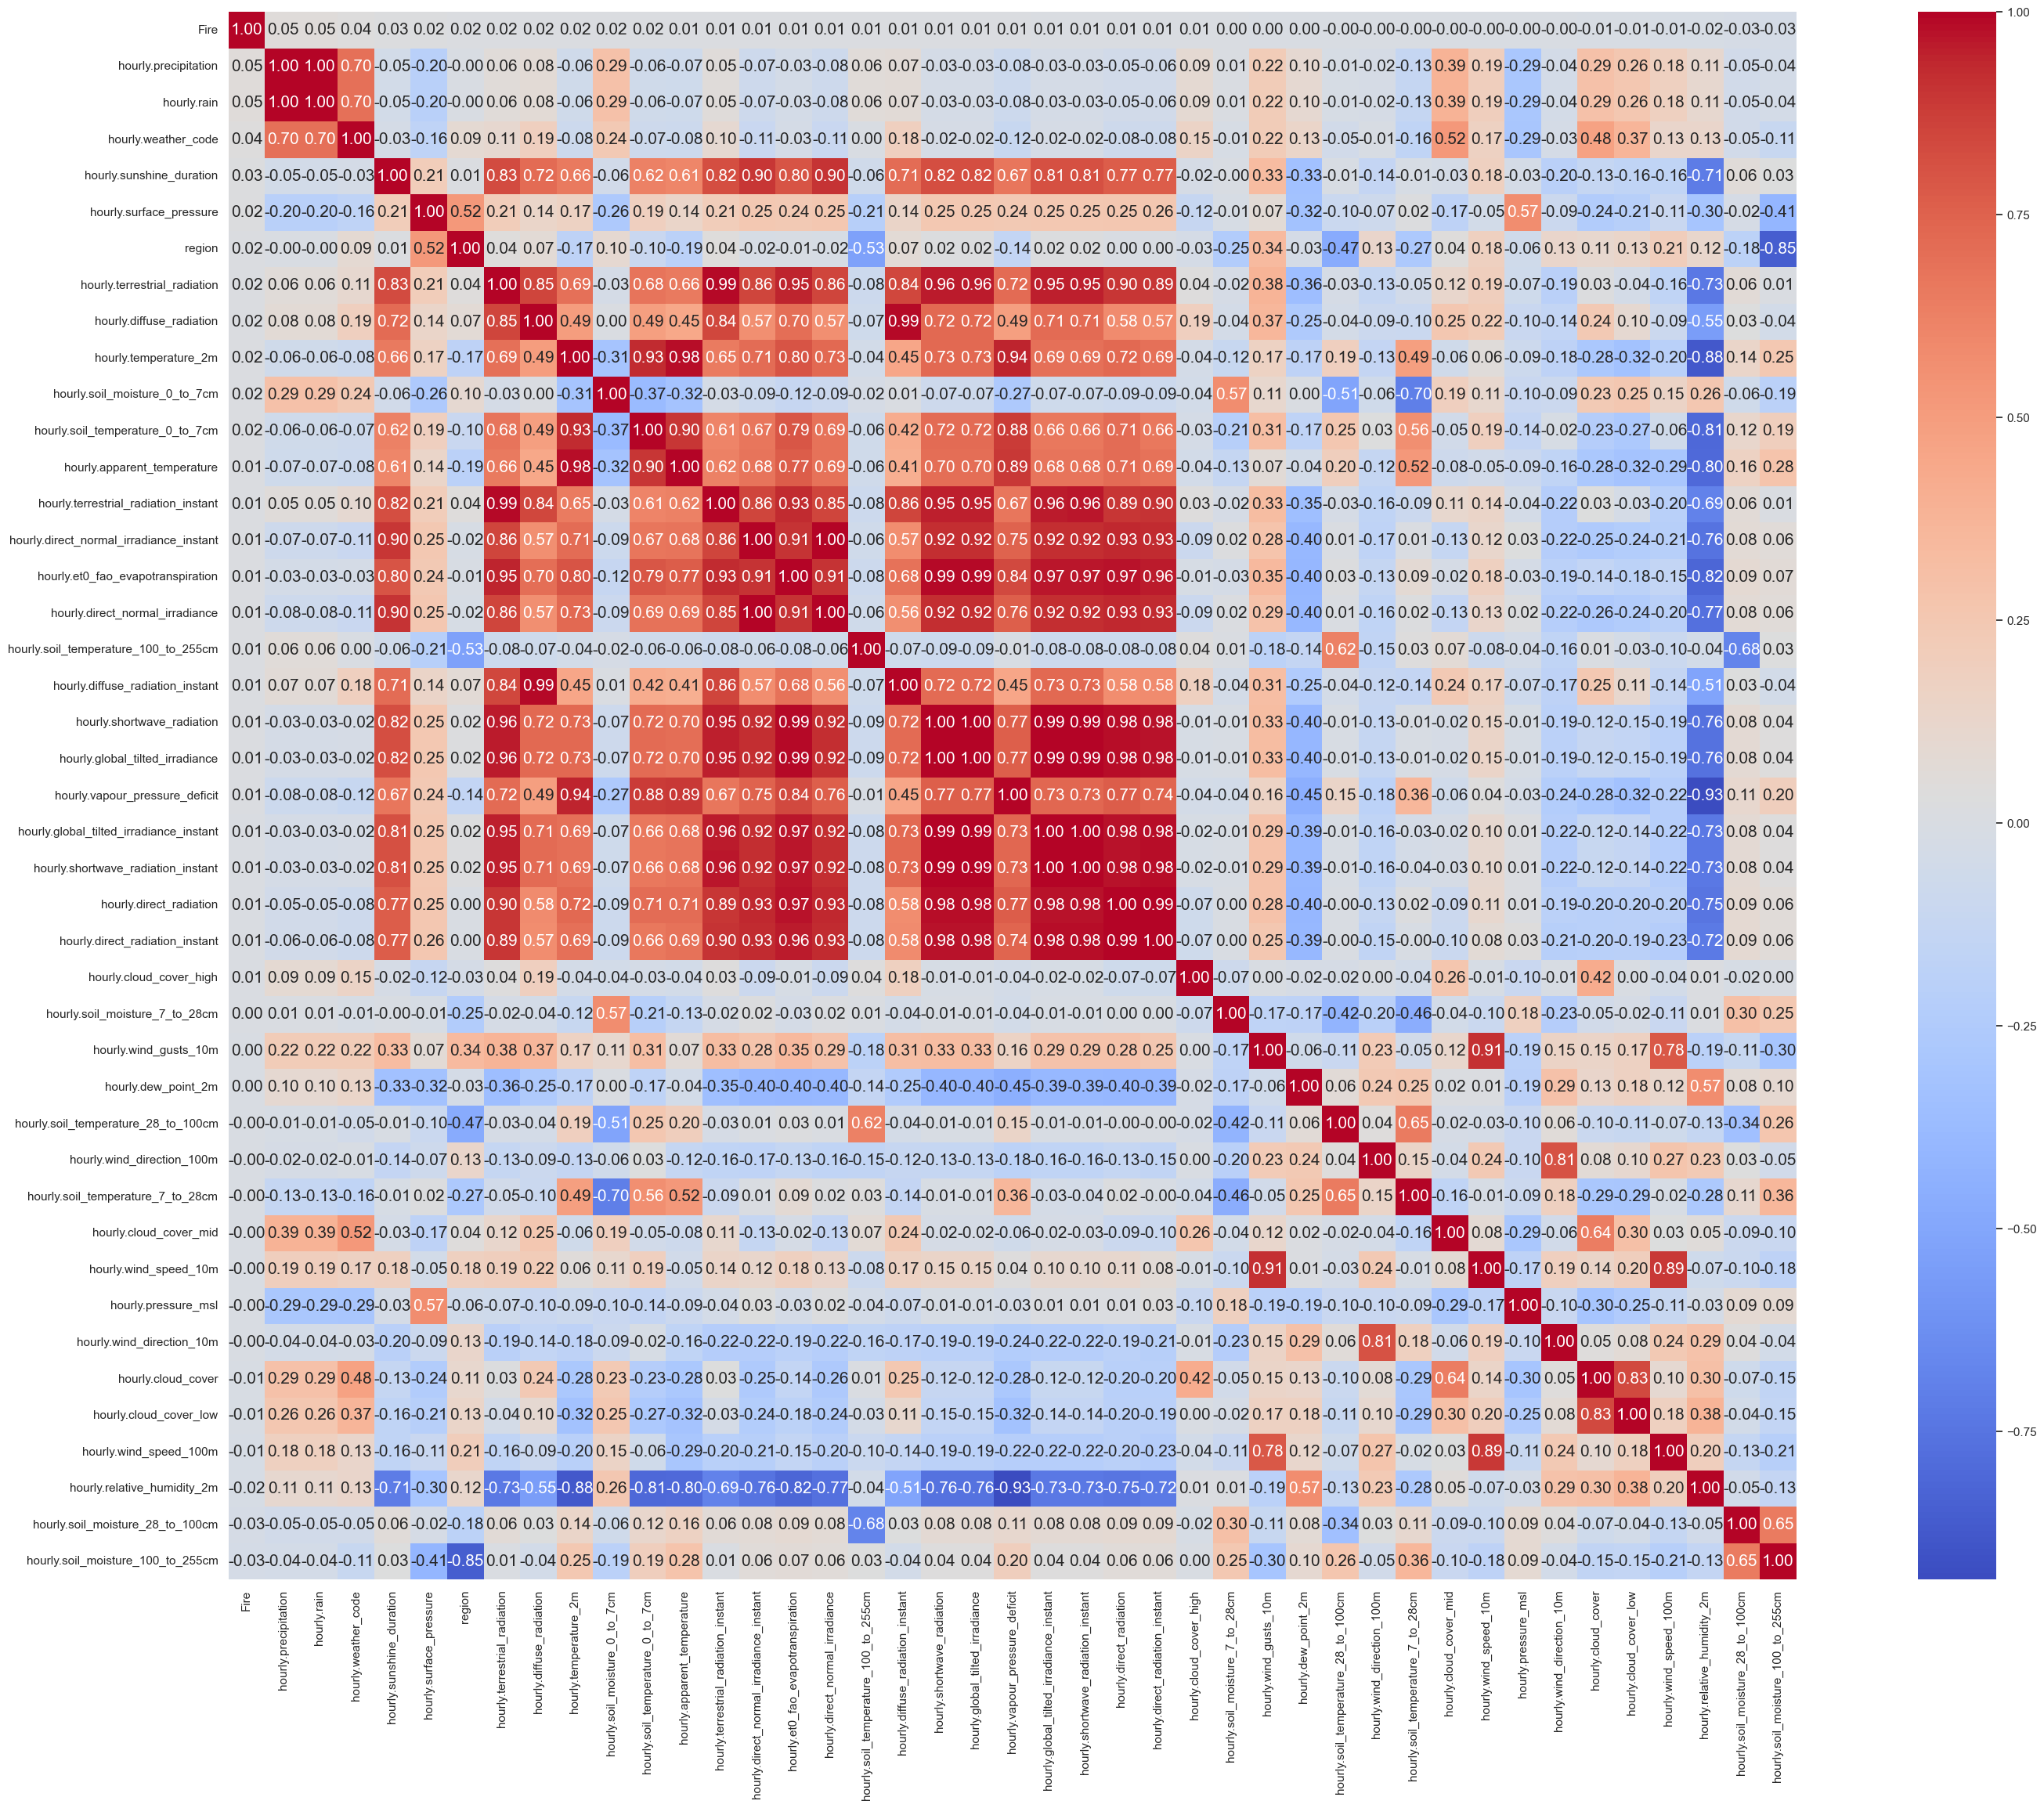

In [7]:
df = pd.concat([d2015, d2019, d2022])

df = df.drop(['hourly.snowfall', 'hourly.snow_depth'], axis=1)

df_numeric = df.select_dtypes(include=[np.number])

corr = df_numeric.corr()

k = len(df_numeric.columns)
cols = corr.nlargest(k, 'Fire')['Fire'].index

cm = np.corrcoef(df_numeric[cols].values.T)

sns.set(font_scale=1)

f, ax = plt.subplots(figsize=(40, 26))

hm = sns.heatmap(cm, annot=True, square=True, cmap='coolwarm', fmt='.2f', annot_kws={'size': 15}, yticklabels=cols.values, xticklabels=cols.values)

plt.savefig('correlation_chart.png')

plt.show()

In [6]:
zero_columns = df_numeric.columns[(df_numeric == 0).all()]
print(zero_columns)

Index(['hourly.snowfall', 'hourly.snow_depth'], dtype='object')


In [ ]:
df['hourly.snowfall'].value_counts()

d2015.info()

d2015.describe().T

d2022 = d2022.drop(['latitude','longitude','altitude'], axis=1)

num_bins = int(np.sqrt(len(d2022)))
plt.style.use('seaborn')
d2015.hist(bins=num_bins, figsize=(40,30), ec = 'b')
plt.show()

d2022_sorted = d2022.sort_values('hourly.time')

d2022_sorted.plot(x='hourly.time', figsize=(40,30))

plt.show()

d2022_sorted.plot(kind='scatter', x='hourly.time', y='hourly.temperature_2m', figsize=(40,30))

plt.show()

import math
import matplotlib.pyplot as plt
import itertools

numeric_cols = d2022.select_dtypes(include=[np.number]).columns.tolist()


if 'hourly.time' in numeric_cols:
    numeric_cols.remove('hourly.time')


colors = itertools.cycle(['b', 'g', 'r', 'c', 'm', 'y', 'k'])


num_rows = math.ceil(len(numeric_cols) / 4)


fig, axs = plt.subplots(num_rows, 4, figsize=(40, 30))


axs = axs.flatten()


for i, col in enumerate(numeric_cols):
    d2022_sorted.plot(x='hourly.time', y=col, ax=axs[i], color=next(colors))
    axs[i].set_title(col)

# Remove unused subplots
for i in range(len(numeric_cols), len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.savefig('samplesNaturalFires/output2022.png')
plt.show()

import math
import matplotlib.pyplot as plt
import itertools

numeric_cols = d2022.select_dtypes(include=[np.number]).columns.tolist()


if 'hourly.time' in numeric_cols:
    numeric_cols.remove('hourly.time')


colors = itertools.cycle(['b', 'g', 'r', 'c', 'm', 'y', 'k'])


num_rows = math.ceil(len(numeric_cols) / 4)


fig, axs = plt.subplots(num_rows, 4, figsize=(40, 30))


axs = axs.flatten()


for i, col in enumerate(numeric_cols):
    x = pd.to_datetime(d2022_sorted['hourly.time']).astype(int) / 10**9
    y = d2022_sorted[col]
    
    # Remove NaN values
    mask = ~np.isnan(x) & ~np.isnan(y)
    x = x[mask].values
    y = y[mask].values
    
    # Plot the original values
    axs[i].plot(x, y, color=next(colors))
    
    # Calculate and plot the regression line
    coeffs = np.polyfit(x, y, 1)
    axs[i].plot(x, coeffs[0] * x + coeffs[1], color='red')
    
    axs[i].set_title(col)

for i in range(len(numeric_cols), len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.savefig('samplesNaturalFires/output2022rl.png')
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
df = pd.read_csv('outputTHREE.csv')

# Add a new column 'Fire', with 0 as the default value
df['Fire'] = 0

# Set the 'Fire' value of the last row to 1
df.loc[df.index[-1], 'Fire'] = 1

numeric_df = df.select_dtypes(include='number')

numeric_df = numeric_df.drop(['latitude', 'longitude', 'altitude', 'hourly.snowfall', 'hourly.snow_depth','hourly.is_day'], axis=1)

# Calculate the correlation of other columns with the 'Fire' column
correlation_with_fire = numeric_df.corr()['Fire']

# Print the correlation with 'Fire'
print(correlation_with_fire)

# Set up the matplotlib figure
plt.figure(figsize=(24, 20))

# Plot the correlation with 'Fire' using a bar plot
correlation_with_fire.drop('Fire').plot(kind='bar')

# Add title
plt.title('Correlation with Fire')

# Show plot
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
df = pd.read_csv('outputTHREE.csv')

# Add a new column 'Fire', with 0 as the default value
df['Fire'] = 0

# Set the 'Fire' value of the last row to 1
df.loc[df.index[-1], 'Fire'] = 1

numeric_df = df.select_dtypes(include='number')

numeric_df = numeric_df.drop(['latitude', 'longitude', 'altitude', 'hourly.snowfall', 'hourly.snow_depth','hourly.is_day'], axis=1)

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Print the correlation matrix
print(correlation_matrix)

# Set up the matplotlib figure
plt.figure(figsize=(24, 20))

# Plot the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)

# Add title
plt.title('Correlation Matrix')

# Show plot
plt.show()

# Correlation chart
k = len(df.columns)
cols = corr.nlargest(k, 'Fire')['Fire'].index
cm = np.corrcoef(df1[cols].values.T)
sns.set(font_scale=1)
f, ax = plt.subplots(figsize=(20, 13))
hm = sns.heatmap(cm, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()
